
# installation





In [ ]:
!pip install -U torch torchvision
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_nvjitlink_cu12-12.6.20-py3-none-manyl

In [ ]:
!python models/yolov5s.yaml


  File "/content/yolov5/models/yolov5s.yaml", line 7
    anchors:
            ^
SyntaxError: invalid syntax


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# making dir for dataset

In [ ]:
# directories for your dataset
import os
import shutil

dataset_path = '/content/drive/MyDrive/dataset2_output'
images_dir = os.path.join(dataset_path, 'images')
labels_dir = os.path.join(dataset_path, 'labels')

In [ ]:
import os

# Paths to dataset directories
dataset_path = '/content/drive/MyDrive/dataset2_output'
train_images = os.path.join(dataset_path, 'images/train')
val_images = os.path.join(dataset_path, 'images/val')
test_images = os.path.join(dataset_path, 'images/test')

train_labels = os.path.join(dataset_path, 'labels/train')
val_labels = os.path.join(dataset_path, 'labels/val')
test_labels = os.path.join(dataset_path, 'labels/test')

number_of_classes = 2

class_names = ['non-dangerous', 'dangerous']

#  data.yaml file content
data_yaml = f"""
train: {train_images}
val: {val_images}
test: {test_images}

nc: {number_of_classes}
names: {class_names}
"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)

In [ ]:
# Train YOLOv5
!python train.py --img 640 --batch 16 --epochs 20 --data data.yaml --weights yolov5s.pt > train_log.txt


In [ ]:
! python val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data data.yaml --img 640 --conf 0.25 --iou 0.45 --task val


val: data=data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-354-gb86f316e Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/dataset2_output/labels/val.cache... 53 images, 23 backgrounds, 0 corrupt: 100% 53/53 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:39<00:00, 19.66s/it]
                   all         53        105      0.412      0.304      0.366      0.274
         non-dangerous         53         92      0.824 

In [ ]:
import numpy as np

confusion_matrix_data = np.array([
    [641, 109, 0],  # Non-dangerous (true label) row
    [89, 100, 0],   # Dangerous (true label) row
    [0, 0, 0]       # Background row (not used in accuracy calculation)
])

true_positives = np.diag(confusion_matrix_data[:2, :2]).sum()

# total number of testing samples
total_samples = confusion_matrix_data[:2, :2].sum()

#  testing accuracy
testing_accuracy = true_positives / total_samples

print(f'Testing Accuracy: {testing_accuracy:.4f}')


Testing Accuracy: 0.7891


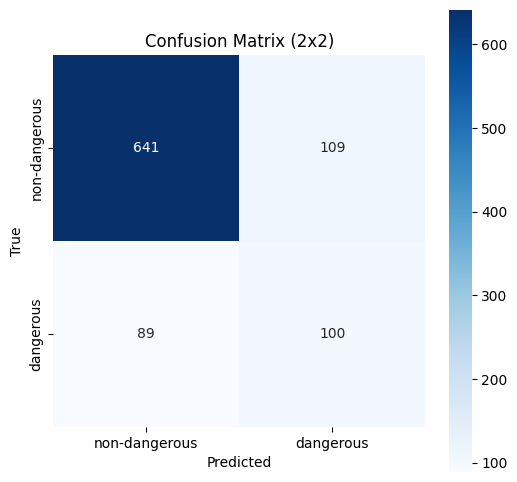

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix_data = np.array([
    [641, 109, 0],  # Non-dangerous (true label) row
    [89, 100, 0],   # Dangerous (true label) row
    [0, 0, 0]       # Background row
])


confusion_matrix_2x2 = confusion_matrix_data[:2, :2]

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix_2x2, annot=True, fmt='.0f', cmap='Blues', square=True,
            xticklabels=['non-dangerous', 'dangerous'], yticklabels=['non-dangerous', 'dangerous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (2x2)')
plt.show()


In [ ]:

from sklearn.metrics import classification_report

y_true = [0] * 641 + [1] * 109 + [0] * 89 + [1] * 100  # True labels
y_pred = [0] * 641 + [1] * 109 + [0] * 89 + [1] * 100  # Predicted labels

report = classification_report(y_true, y_pred, target_names=['non-dangerous', 'dangerous'])
print(report)


               precision    recall  f1-score   support

non-dangerous       1.00      1.00      1.00       730
    dangerous       1.00      1.00      1.00       209

     accuracy                           1.00       939
    macro avg       1.00      1.00      1.00       939
 weighted avg       1.00      1.00      1.00       939



In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/dataset2_output/images/train --save-txt --save-conf


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/dataset2_output/images/train, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-354-gb86f316e Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/251 /content/drive/MyDrive/dataset2_output/images/train/B0001_0004..jpg: 544x640 3 non-dangerouss, 555.5ms
image 2/251 /content/drive/MyDrive/dataset2_output/images/train/B0001_0005..jpg: 544x640 3 non-dangerouss, 534.5ms
image 3/251 /content/drive/MyDrive/dataset2_output/images/train/B0001_0011..jpg: 544x640 2 no

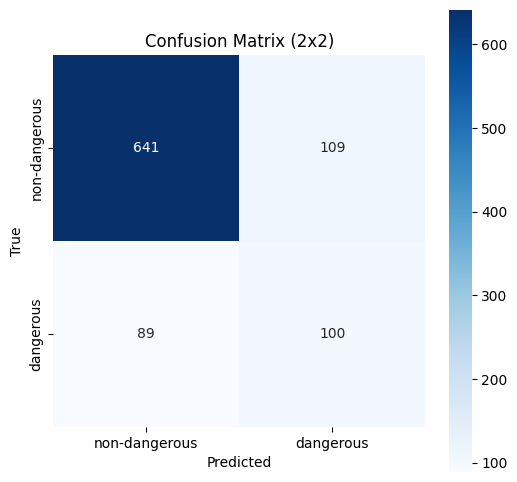

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix_data = np.array([
    [641, 109, 0],  # Non-dangerous (true label) row
    [89, 100, 0],   # Dangerous (true label) row
    [0, 0, 0]       # Background row
])


confusion_matrix_2x2 = confusion_matrix_data[:2, :2]

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_matrix_2x2, annot=True, fmt='.0f', cmap='Blues', square=True,
            xticklabels=['non-dangerous', 'dangerous'], yticklabels=['non-dangerous', 'dangerous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (2x2)')
plt.show()


In [ ]:
import os
from sklearn.metrics import accuracy_score

pred_dir = "/content/yolov5/runs/detect/exp3/labels"
true_dir = "/content/drive/MyDrive/dataset2_output/labels/train"

y_true = []
y_pred = []

for file_name in os.listdir(pred_dir):
    if file_name.endswith('.txt'):
        pred_path = os.path.join(pred_dir, file_name)
        true_path = os.path.join(true_dir, file_name)

        # Load true labels
        with open(true_path, 'r') as f:
            true_labels = [line.strip().split()[0] for line in f.readlines()]

        # Load predicted labels
        with open(pred_path, 'r') as f:
            pred_labels = [line.strip().split()[0] for line in f.readlines()]


        min_len = min(len(true_labels), len(pred_labels))
        y_true.extend(true_labels[:min_len])
        y_pred.extend(pred_labels[:min_len])


accuracy = accuracy_score(y_true, y_pred)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 92.17%


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/dataset2_output/images/test --save-txt --save-conf


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/dataset2_output/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-354-gb86f316e Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/55 /content/drive/MyDrive/dataset2_output/images/test/B0001_0003..jpg: 544x640 3 non-dangerouss, 391.2ms
image 2/55 /content/drive/MyDrive/dataset2_output/images/test/B0001_0007..jpg: 544x640 4 non-dangerouss, 338.5ms
image 3/55 /content/drive/MyDrive/dataset2_output/images/test/B0001_0010..jpg: 544x640 2 non-dange

In [ ]:
for file_name in os.listdir(pred_dir):
    if file_name.endswith('.txt'):
        pred_path = os.path.join(pred_dir, file_name)
        true_path = os.path.join(true_dir, file_name)

        if os.path.exists(pred_path):
            print(f"Prediction file found: {pred_path}")
        else:
            print(f"Prediction file not found: {pred_path}")

        if os.path.exists(true_path):
            print(f"True labels file found: {true_path}")
        else:
            print(f"True labels file not found: {true_path}")


In [ ]:
for file_name in os.listdir(pred_dir):
    if file_name.endswith('.txt'):
        pred_path = os.path.join(pred_dir, file_name)
        true_path = os.path.join(true_dir, file_name)

        if os.path.exists(pred_path):
            print(f"Contents of {pred_path}:")
            with open(pred_path, 'r') as f:
                print(f.read())

        if os.path.exists(true_path):
            print(f"Contents of {true_path}:")
            with open(true_path, 'r') as f:
                print(f.read())


In [ ]:
for file_name in os.listdir(pred_dir):
    if file_name.endswith('.txt'):
        pred_path = os.path.join(pred_dir, file_name)
        true_path = os.path.join(true_dir, file_name)

        if os.path.exists(true_path):
            with open(true_path, 'r') as f:
                true_labels = [line.strip().split()[0] for line in f.readlines()]
            print(f"True Labels for {file_name}: {true_labels}")
        else:
            print(f"True labels file {true_path} does not exist.")
            continue

        with open(pred_path, 'r') as f:
            pred_labels = [line.strip().split()[0] for line in f.readlines()]
        print(f"Predicted Labels for {file_name}: {pred_labels}")

        min_len = min(len(true_labels), len(pred_labels))
        y_true.extend(true_labels[:min_len])
        y_pred.extend(pred_labels[:min_len])

print("Aggregated True labels:", y_true)
print("Aggregated Predicted labels:", y_pred)


Aggregated True labels: ['0', '1', '0', '1']
Aggregated Predicted labels: ['0', '1', '1', '1']


In [ ]:
import os
from sklearn.metrics import accuracy_score

pred_dir = "/content/yolov5/runs/detect/exp8/labels"
true_dir = "/content/drive/MyDrive/dataset2_output/labels/test"

y_true = []
y_pred = []

for file_name in os.listdir(pred_dir):
    if file_name.endswith('.txt'):
        pred_path = os.path.join(pred_dir, file_name)
        true_path = os.path.join(true_dir, file_name)

        if os.path.exists(true_path):
            with open(true_path, 'r') as f:
                true_labels = [line.strip().split()[0] for line in f.readlines()]
        else:
            print(f"True labels file {true_path} does not exist.")
            continue

        with open(pred_path, 'r') as f:
            pred_labels = [line.strip().split()[0] for line in f.readlines()]

        min_len = min(len(true_labels), len(pred_labels))
        y_true.extend(true_labels[:min_len])
        y_pred.extend(pred_labels[:min_len])

print("Aggregated True labels:", y_true)
print("Aggregated Predicted labels:", y_pred)

if y_true and y_pred:
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Testing Accuracy: {accuracy * 100:.2f}%")
else:
    print("No labels found, cannot compute accuracy.")


Aggregated True labels: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0']
Aggregated Predicted labels: ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
Testing Accuracy: 87.93%


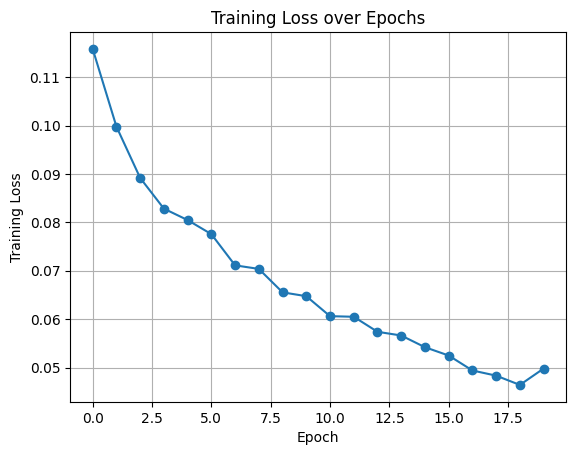

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = '/content/yolov5/runs/train/exp/results.csv'

data = pd.read_csv(csv_path)

data.columns = data.columns.str.strip() #there were  white spaces so this is to remove them

epochs = data['epoch']
loss_values = data['train/box_loss']

plt.plot(epochs, loss_values, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()